<a href="https://colab.research.google.com/github/Lopesg-Marcia/Data-Analysis/blob/main/Google_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

# Upload data

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1jd3c7CpUC0pgSxLVYXSFncqVEea3hLOivc3MlNq-axo/gviz/tq?tqx=out:csv'

In [ ]:
dataset = pd.read_csv(url)

In [ ]:
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 465,348.0,4045,$1.50,8.60%,11,3.16%
1,Campaign 57,908.0,17668,$1.48,5.14%,53,5.84%
2,Campaign 59,331.0,6464,$1.45,5.12%,18,5.44%
3,Campaign 464,909.0,17677,$1.45,5.14%,29,3.19%
4,Campaign 8,542.0,5424,$1.44,9.99%,32,5.90%


# Initial Data Exploration

## Dataset

In [ ]:
# Size
dataset.shape


(500, 7)

In [ ]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   CTR            499 non-null    object 
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None


In [ ]:
# Visualize
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 465,348.0,4045,$1.50,8.60%,11,3.16%
1,Campaign 57,908.0,17668,$1.48,5.14%,53,5.84%
2,Campaign 59,331.0,6464,$1.45,5.12%,18,5.44%
3,Campaign 464,909.0,17677,$1.45,5.14%,29,3.19%
4,Campaign 8,542.0,5424,$1.44,9.99%,32,5.90%


## Attributes

In [ ]:
dataset['Campaign Name'].describe()

,Campaign Name
count,500
unique,500
top,Campaign 465
freq,1


In [ ]:
dataset['Clicks'].describe()

,Clicks
count,499.000000
mean,589.042084
std,233.816528
min,202.000000
25%,376.500000
50%,583.000000
75%,780.000000
max,1000.000000


In [ ]:
dataset['Impressions'].describe()

,Impressions
count,500.000000
mean,7089.748000
std,3700.703581
min,2004.000000
25%,4254.750000
50%,6358.000000
75%,8835.000000
max,19414.000000


In [ ]:
dataset['CPC'].describe()

,CPC
count,499
unique,85
top,$0.69
freq,17


In [ ]:
dataset['CTR'].describe()

,CTR
count,499
unique,328
top,7.51%
freq,37


In [ ]:
dataset['Conversions'].describe()

,Conversions
count,500.000000
mean,28.224000
std,11.949368
min,8.000000
25%,18.000000
50%,28.000000
75%,36.250000
max,58.000000


In [ ]:
dataset['CVR'].describe()

,CVR
count,499
unique,225
top,5.82%
freq,8


# Data Transformation

## Treat Incorrect Data Types

In [ ]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   CTR            499 non-null    object 
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None


### CPC

In [ ]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(dataset['CPC'], errors='coerce')
print(temp_cpc.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CPC, dtype: float64


In [ ]:
# Replacing commas with periods
temp_cpc = dataset['CPC'].str.replace(',', '.', regex=True)
print(temp_cpc.head())

0    $1.50
1    $1.48
2    $1.45
3    $1.45
4    $1.44
Name: CPC, dtype: object


In [ ]:
# Removing non-numeric characters such as symbols or spaces
temp_cpc = dataset['CPC'].str.replace('[^\d.]', '', regex=True)
print(temp_cpc.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: object


In [ ]:
# Converting Object to Numeric
temp_cpc = pd.to_numeric(temp_cpc, errors='coerce')
print(temp_cpc.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


In [ ]:
dataset['CPC'] = temp_cpc
print(dataset['CPC'].head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


### CTR

In [ ]:
# Converting Object to Numeric
temp_ctr = pd.to_numeric(dataset['CTR'], errors='coerce')
print(temp_ctr.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CTR, dtype: float64


In [ ]:
# Replacing commas with periods
temp_ctr = dataset['CTR'].str.replace(',', '.', regex=True)
print(temp_ctr.head())

0    8.60%
1    5.14%
2    5.12%
3    5.14%
4    9.99%
Name: CTR, dtype: object


In [ ]:
# Removing non-numeric characters such as symbols or spaces
temp_ctr = dataset['CTR'].str.replace('[^\d.]', '', regex=True)
print(temp_ctr.head())

0    8.60
1    5.14
2    5.12
3    5.14
4    9.99
Name: CTR, dtype: object


In [ ]:
# Converting Object to Numeric
temp_ctr = pd.to_numeric(temp_ctr, errors='coerce')
print(temp_ctr.head())

0    8.60
1    5.14
2    5.12
3    5.14
4    9.99
Name: CTR, dtype: float64


In [ ]:
dataset['CTR'] = temp_ctr
print(dataset['CTR'].head())

0    8.60
1    5.14
2    5.12
3    5.14
4    9.99
Name: CTR, dtype: float64


### CVR

In [ ]:
# Converting Object to Numeric
temp_cvr = pd.to_numeric(dataset['CVR'], errors='coerce')
print(temp_cvr.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CVR, dtype: float64


In [ ]:
# Replacing commas with periods
temp_cvr = dataset['CVR'].str.replace(',', '.', regex=True)
print(temp_cvr.head())

0    3.16%
1    5.84%
2    5.44%
3    3.19%
4    5.90%
Name: CVR, dtype: object


In [ ]:
# Removing non-numeric characters such as symbols or spaces
temp_cvr = dataset['CVR'].str.replace('[^\d.]', '', regex=True)
print(temp_cvr.head())

0    3.16
1    5.84
2    5.44
3    3.19
4    5.90
Name: CVR, dtype: object


In [ ]:
# Converting Object to Numeric
temp_cvr = pd.to_numeric(temp_cvr, errors='coerce')
print(temp_cvr.head())

0    3.16
1    5.84
2    5.44
3    3.19
4    5.90
Name: CVR, dtype: float64


In [ ]:
dataset['CVR'] = temp_cvr
print(dataset['CVR'].head())

0    3.16
1    5.84
2    5.44
3    3.19
4    5.90
Name: CVR, dtype: float64


In [ ]:
# Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    float64
 4   CTR            499 non-null    float64
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB
None


# Data Exploration and Analysis

## Clicks

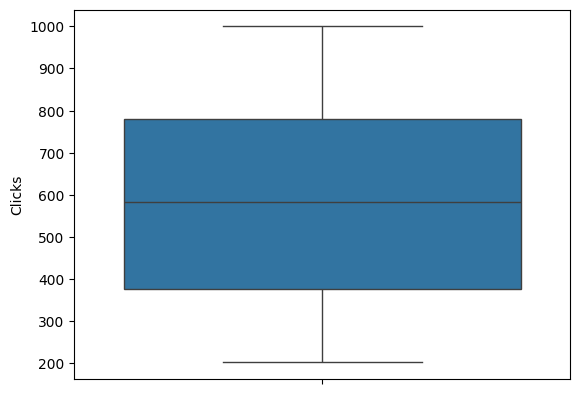

In [ ]:
srn.boxplot(dataset['Clicks'])
plt.show()

<Axes: xlabel='Clicks', ylabel='Count'>

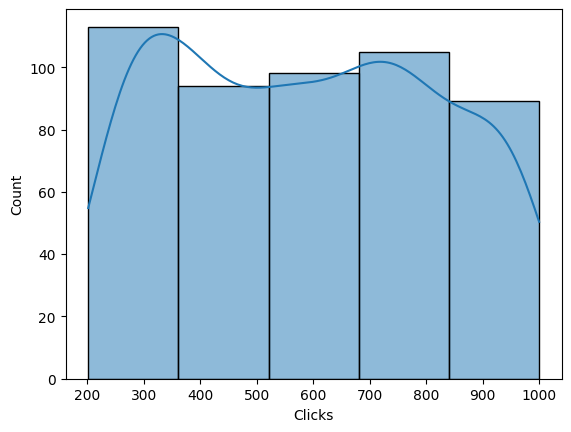

In [ ]:
srn.histplot(dataset['Clicks'],bins=5,kde=True)

## Impressions

<Axes: ylabel='Impressions'>

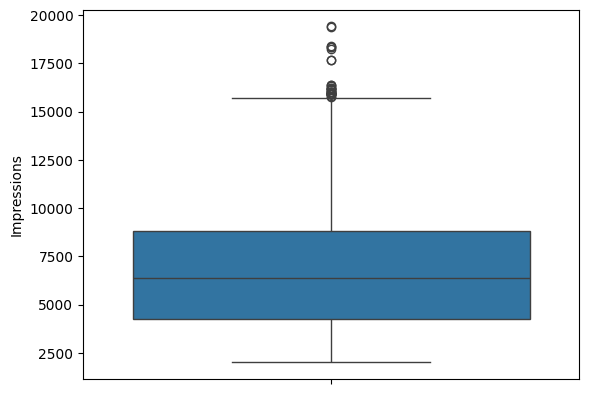

In [ ]:
srn.boxplot(dataset['Impressions'])

<Axes: xlabel='Impressions', ylabel='Count'>

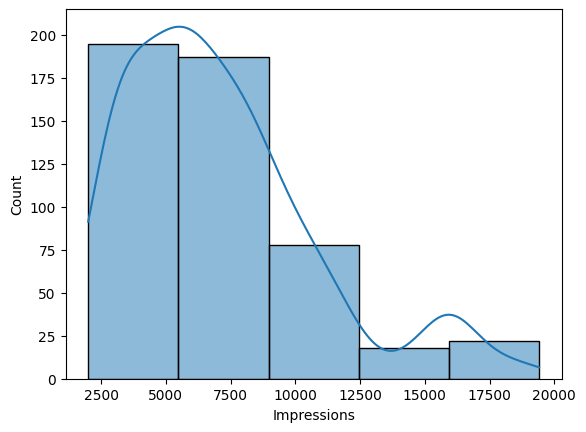

In [ ]:
srn.histplot(dataset['Impressions'],bins=5,kde=True)

## CPC

<Axes: ylabel='CPC'>

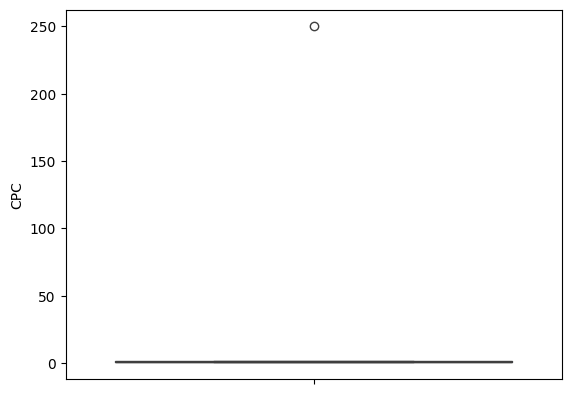

In [ ]:
srn.boxplot(dataset['CPC'])

<Axes: xlabel='CPC', ylabel='Count'>

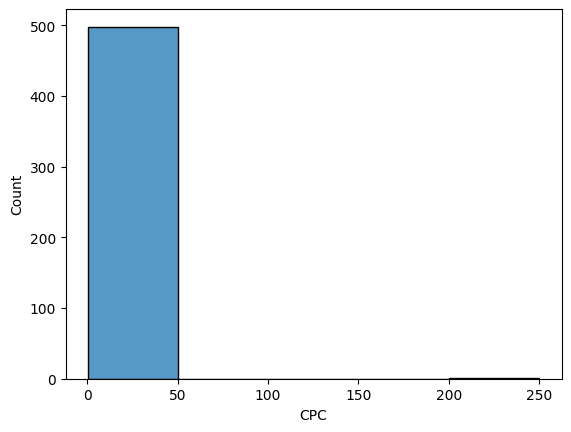

In [ ]:
srn.histplot(dataset['CPC'],bins=5)

In [ ]:
dataset['CPC'].describe()

,CPC
count,499.000000
mean,1.359960
std,11.155968
min,0.440000
25%,0.640000
50%,0.820000
75%,1.100000
max,250.000000


In [ ]:
# Creating a temporary series to show Boxplot without Outliers
temp_cpc2 = dataset['CPC']
print(temp_cpc2.head())

0    1.50
1    1.48
2    1.45
3    1.45
4    1.44
Name: CPC, dtype: float64


In [ ]:
Q1 = temp_cpc2.quantile(0.25)
Q3 = temp_cpc2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = temp_cpc2[(temp_cpc2 >= lower_bound) & (temp_cpc2 <= upper_bound)]

<Axes: ylabel='CPC'>

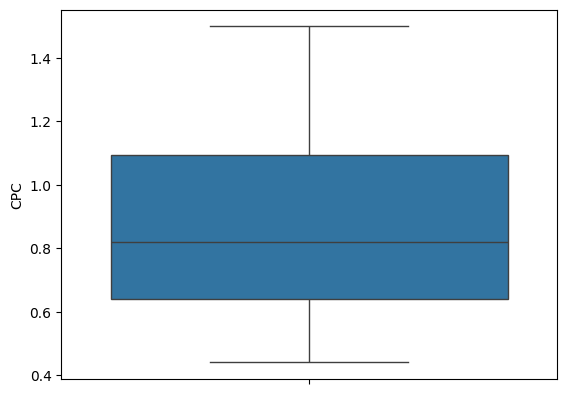

In [ ]:
# Boxplot without Outliers
srn.boxplot(filtered_data)

<Axes: xlabel='CPC', ylabel='Count'>

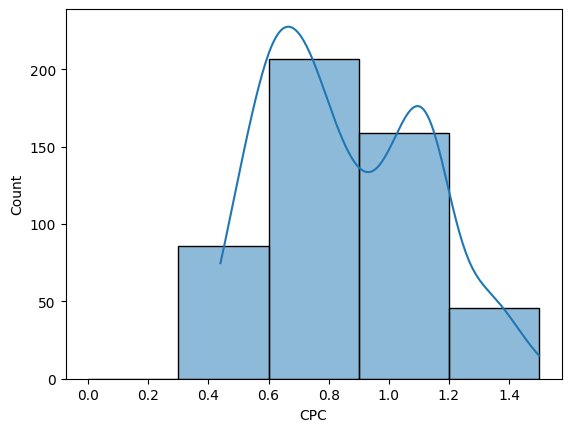

In [ ]:
# Histogram without Outliers
bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
srn.histplot(filtered_data,bins=bins,kde=True)

## CTR

<Axes: ylabel='CTR'>

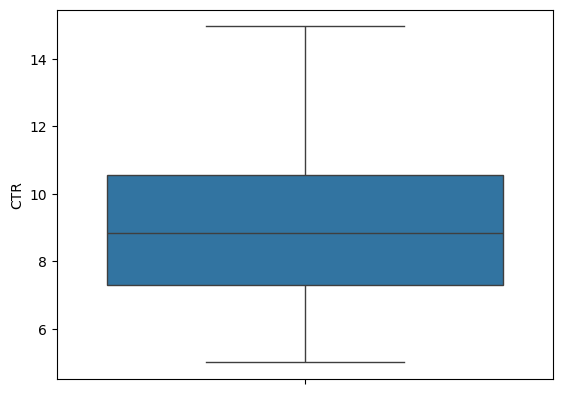

In [ ]:
srn.boxplot(dataset['CTR'])

<Axes: xlabel='CTR', ylabel='Count'>

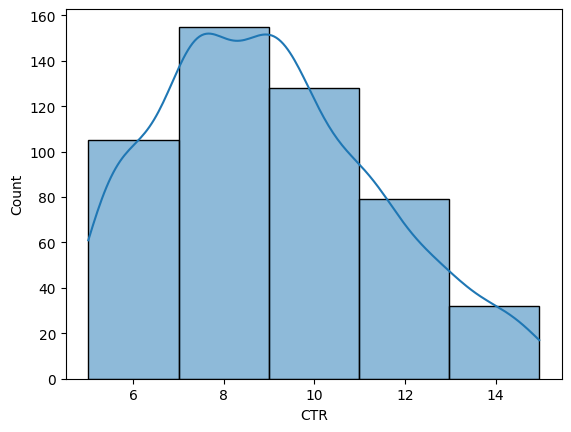

In [ ]:
srn.histplot(dataset['CTR'],bins=5, kde=True)

## Conversions

<Axes: ylabel='Conversions'>

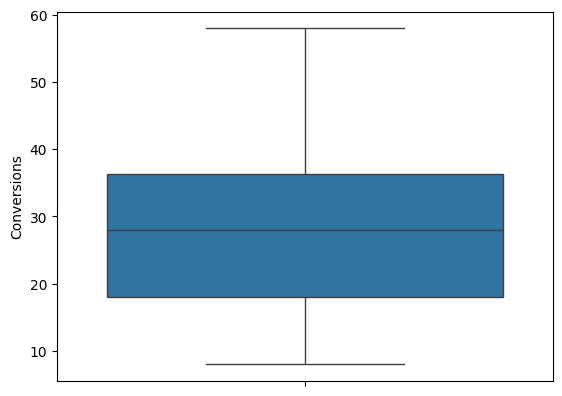

In [ ]:
srn.boxplot(dataset['Conversions'])

<Axes: xlabel='Conversions', ylabel='Count'>

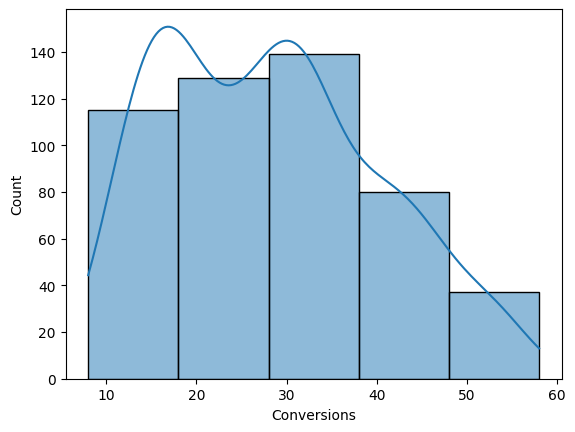

In [ ]:
srn.histplot(dataset['Conversions'],bins=5,kde=True)

## CVR

<Axes: ylabel='CVR'>

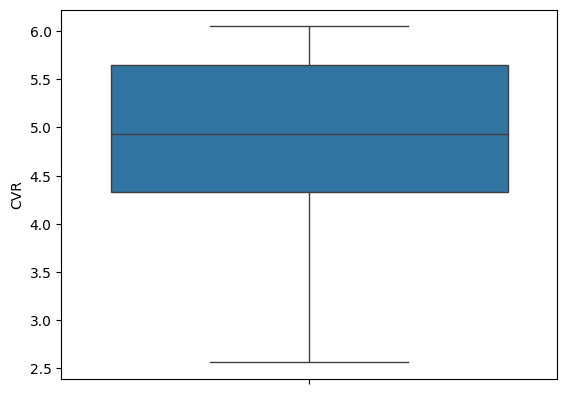

In [ ]:
srn.boxplot(dataset['CVR'])

<Axes: xlabel='CVR', ylabel='Count'>

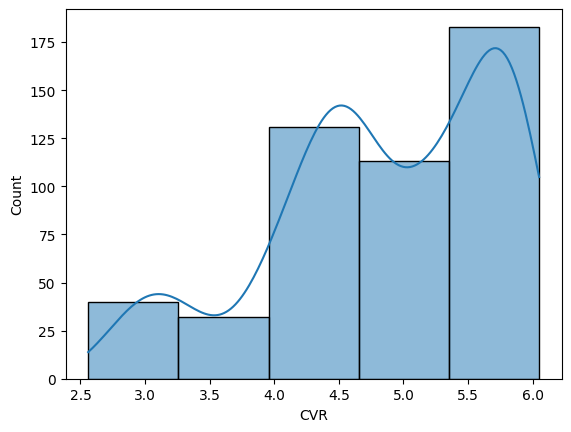

In [ ]:
srn.histplot(dataset['CVR'],bins=5, kde=True)

# Data Cleaning

## Treat Missing Values

In [ ]:
# Check NAN
dataset.isnull().sum()

,0
Campaign Name,0
Clicks,1
Impressions,0
CPC,1
CTR,1
Conversions,0
CVR,1


### Clicks

In [ ]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_clicks = dataset['Clicks'].median()
dataset['Clicks'].fillna(mediana_clicks, inplace=True)

### CPC

In [ ]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_cpc = dataset['CPC'].median()
dataset['CPC'].fillna(mediana_cpc, inplace=True)

### CTR

In [ ]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_ctr = dataset['CTR'].median()
dataset['CTR'].fillna(mediana_ctr, inplace=True)

### CVR

In [ ]:
# Replacing Null with the median as the distribution is asymmetric and has outliers
mediana_cvr = dataset['CVR'].median()
dataset['CVR'].fillna(mediana_cvr, inplace=True)

In [ ]:
# Check NAN
dataset.isnull().sum()

,0
Campaign Name,0
Clicks,0
Impressions,0
CPC,0
CTR,0
Conversions,0
CVR,0


## Treat Duplicate Values

In [ ]:
dup = dataset.duplicated()
print(dup)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [ ]:
num_dup = dataset.duplicated().sum()
print(num_dup)

0


## Treat Outliers

### Clicks

In [ ]:
Q1 = dataset['Clicks'].quantile(0.25)
Q3 = dataset['Clicks'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_clicks = dataset[(dataset['Clicks'] < limite_inferior) | (dataset['Clicks'] > limite_superior)]
print(out_clicks)

Empty DataFrame
Columns: [Campaign Name, Clicks, Impressions, CPC, CTR, Conversions, CVR]
Index: []


### Impressions

In [ ]:
Q1 = dataset['Impressions'].quantile(0.25)
Q3 = dataset['Impressions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_imp = dataset[(dataset['Impressions'] < limite_inferior) | (dataset['Impressions'] > limite_superior)]
print(out_imp)

    Campaign Name  Clicks  Impressions   CPC   CTR  Conversions   CVR
1     Campaign 57   908.0        17668  1.48  5.14           53  5.84
3    Campaign 464   909.0        17677  1.45  5.14           29  3.19
13   Campaign 410   974.0        18328  1.37  5.31           40  4.11
25   Campaign 483   974.0        16172  1.32  6.02           29  2.98
31   Campaign 478   928.0        15901  1.31  5.84           28  3.02
32   Campaign 479   895.0        16135  1.31  5.55           27  3.02
76   Campaign 285   997.0        19414  1.14  5.14           47  4.71
134  Campaign 389   984.0        18411  1.06  5.34           42  4.27
136   Campaign 52   988.0        19380  1.06  5.10           58  5.87
150  Campaign 197   980.0        16228  1.04  6.04           52  5.31
159  Campaign 370   988.0        16374  1.03  6.03           43  4.35
166  Campaign 148   957.0        18328  1.02  5.22           54  5.64
204  Campaign 476   920.0        15901  0.91  5.79           28  3.04
248  Campaign 339   

### CPC

In [ ]:
Q1 = dataset['CPC'].quantile(0.25)
Q3 = dataset['CPC'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_cpc = dataset[(dataset['CPC'] < limite_inferior) | (dataset['CPC'] > limite_superior)]
print(out_cpc)


    Campaign Name  Clicks  Impressions    CPC  CTR  Conversions   CVR
338  Campaign 317   748.0        10241  250.0  7.3           34  4.55


In [ ]:
# Removing Outlier
dataset_new = dataset[(dataset['CPC'] >= limite_inferior) & (dataset['CPC'] <= limite_superior)]
dataset_new.shape

(499, 7)

In [ ]:
dataset=dataset_new
dataset.shape
dataset['CPC'].describe()

,CPC
count,499.000000
mean,0.860601
std,0.256990
min,0.440000
25%,0.640000
50%,0.820000
75%,1.090000
max,1.500000


In [ ]:
dataset['CPC'].describe()

,CPC
count,499.000000
mean,0.860601
std,0.256990
min,0.440000
25%,0.640000
50%,0.820000
75%,1.090000
max,1.500000


### CTR

In [ ]:
Q1 = dataset['CTR'].quantile(0.25)
Q3 = dataset['CTR'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_ctr = dataset[(dataset['CTR'] < limite_inferior) | (dataset['CTR'] > limite_superior)]
print(out_ctr)

Empty DataFrame
Columns: [Campaign Name, Clicks, Impressions, CPC, CTR, Conversions, CVR]
Index: []


### Conversions

In [ ]:
Q1 = dataset['Conversions'].quantile(0.25)
Q3 = dataset['Conversions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_conv = dataset[(dataset['Conversions'] < limite_inferior) | (dataset['Conversions'] > limite_superior)]
print(out_conv)

Empty DataFrame
Columns: [Campaign Name, Clicks, Impressions, CPC, CTR, Conversions, CVR]
Index: []


### CVR

In [ ]:
Q1 = dataset['CVR'].quantile(0.25)
Q3 = dataset['CVR'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_cvr = dataset[(dataset['CVR'] < limite_inferior) | (dataset['CVR'] > limite_superior)]
print(out_cvr)

Empty DataFrame
Columns: [Campaign Name, Clicks, Impressions, CPC, CTR, Conversions, CVR]
Index: []


## Results

In [ ]:
dataset[['Clicks', 'Impressions', 'CPC', 'CTR', 'Conversions', 'CVR']].describe()

,Clicks,Impressions,CPC,CTR,Conversions,CVR
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,588.711423,7083.432866,0.860601,8.960982,28.212425,4.857174
std,233.707926,3701.719453,0.256990,2.398614,11.958553,0.880457
min,202.000000,2004.000000,0.440000,5.010000,8.000000,2.560000
25%,376.500000,4254.500000,0.640000,7.310000,18.000000,4.325000
50%,583.000000,6358.000000,0.820000,8.850000,28.000000,4.930000
75%,780.000000,8827.000000,1.090000,10.565000,36.500000,5.645000
max,1000.000000,19414.000000,1.500000,14.960000,58.000000,6.050000


In [ ]:
dataset.isnull().any()

,0
Campaign Name,False
Clicks,False
Impressions,False
CPC,False
CTR,False
Conversions,False
CVR,False


# Data Visualization

<Axes: ylabel='Clicks'>

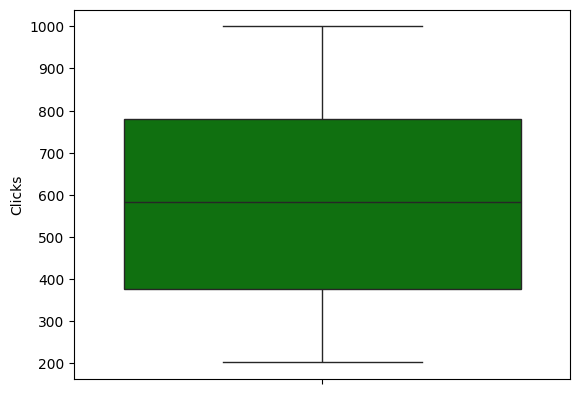

In [ ]:
srn.boxplot(dataset['Clicks'],color='green')

Text(0.5, 1.0, 'Clicks Distribution')

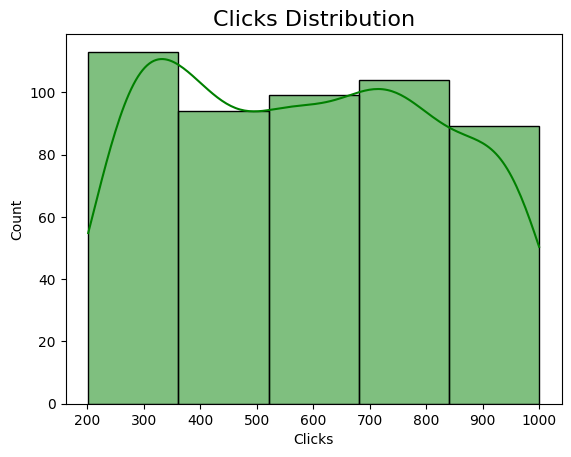

In [ ]:
srn.histplot(dataset['Clicks'],bins=5,color='green',kde=True)
plt.title('Clicks Distribution', fontsize=16)

<Axes: ylabel='Clicks'>

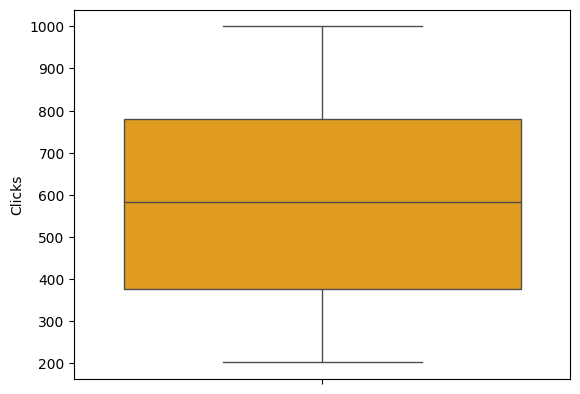

In [ ]:
srn.boxplot(dataset['Clicks'],color='orange')

Text(0.5, 1.0, 'Impressions Distribution')

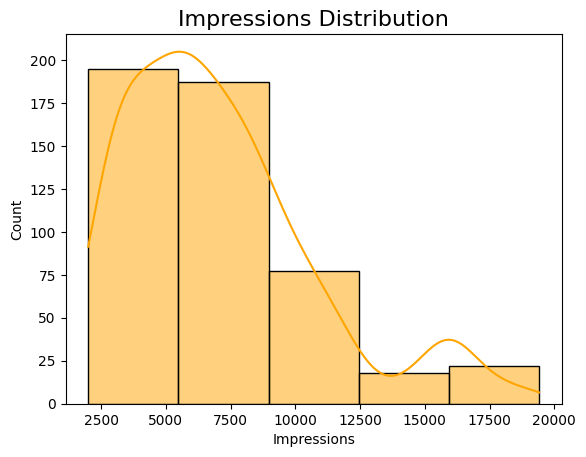

In [ ]:
srn.histplot(dataset['Impressions'],bins=5,color='orange',kde=True)
plt.title('Impressions Distribution', fontsize=16)

<Axes: ylabel='CPC'>

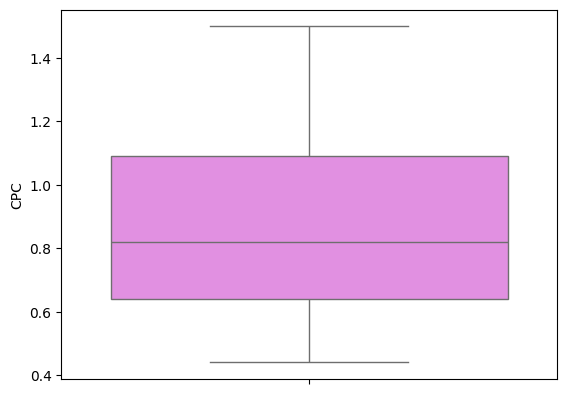

In [ ]:
srn.boxplot(dataset['CPC'],color='violet')

Text(0.5, 1.0, 'CPC Distribution')

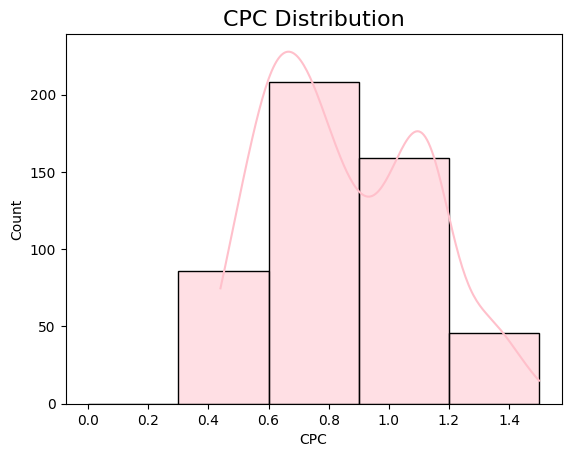

In [ ]:
bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
srn.histplot(dataset['CPC'],bins=bins,color='pink',kde=True)
plt.title('CPC Distribution', fontsize=16)

<Axes: ylabel='CTR'>

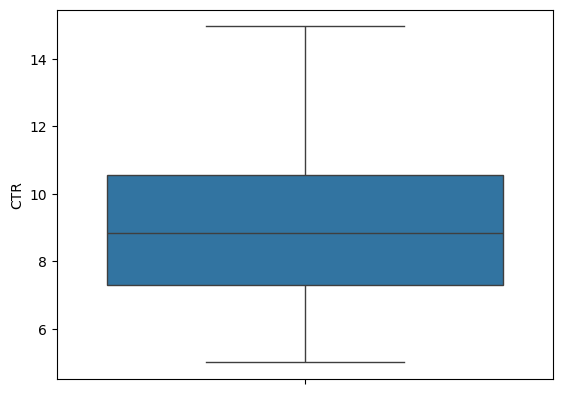

In [ ]:
srn.boxplot(dataset['CTR'])

Text(0.5, 1.0, 'CPC Distribution')

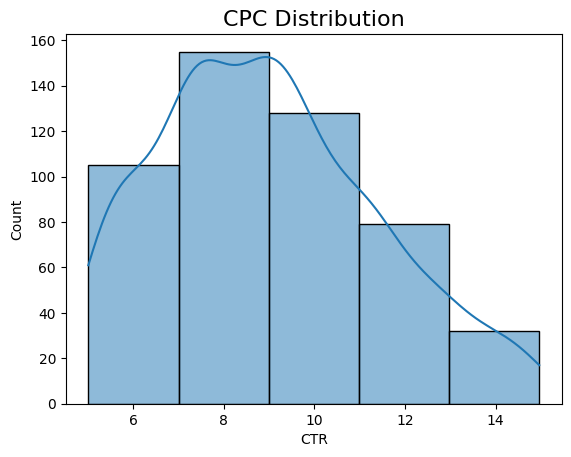

In [ ]:
srn.histplot(dataset['CTR'],bins=5,kde=True)
plt.title('CTR Distribution', fontsize=16)

<Axes: ylabel='Conversions'>

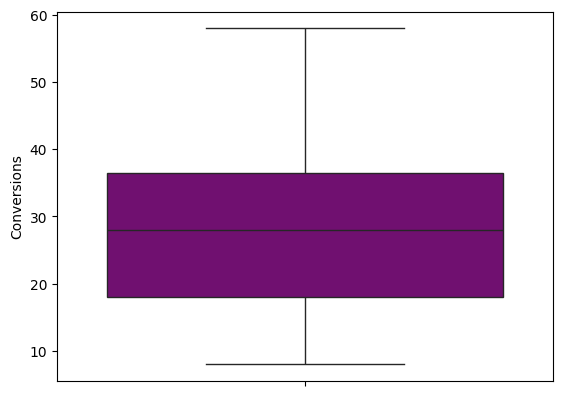

In [ ]:
srn.boxplot(dataset['Conversions'],color='purple')

Text(0.5, 1.0, 'Conversions Distribution')

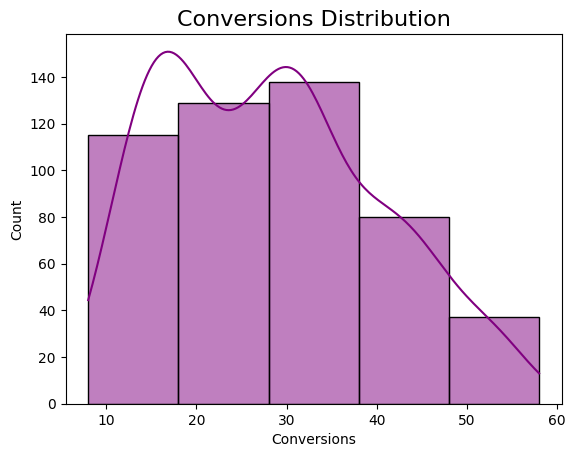

In [ ]:
srn.histplot(dataset['Conversions'],bins=5,color='purple',kde=True)
plt.title('Conversions Distribution', fontsize=16)

<Axes: ylabel='CVR'>

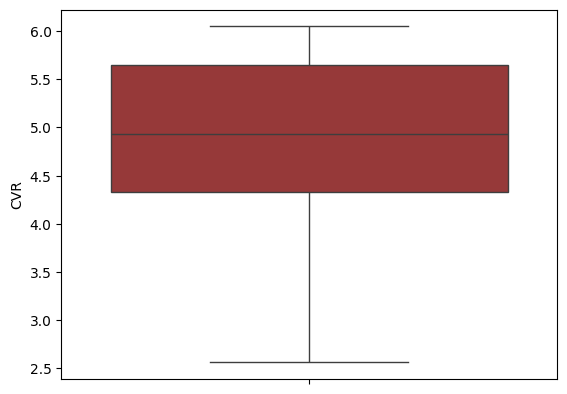

In [ ]:
srn.boxplot(dataset['CVR'],color='brown')

Text(0.5, 1.0, 'CVR Distribution')

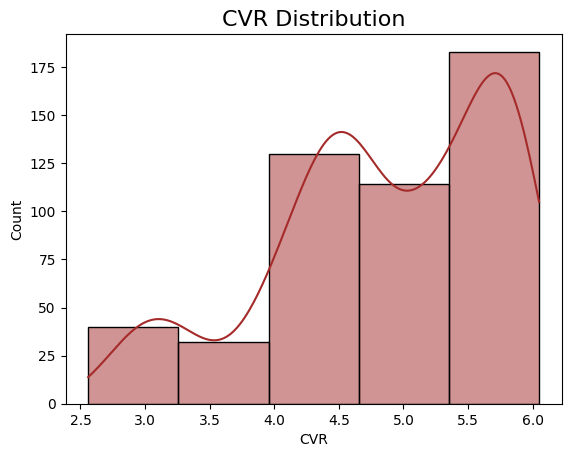

In [ ]:
srn.histplot(dataset['CVR'],bins=5,color='brown',kde=True)
plt.title('CVR Distribution', fontsize=16)

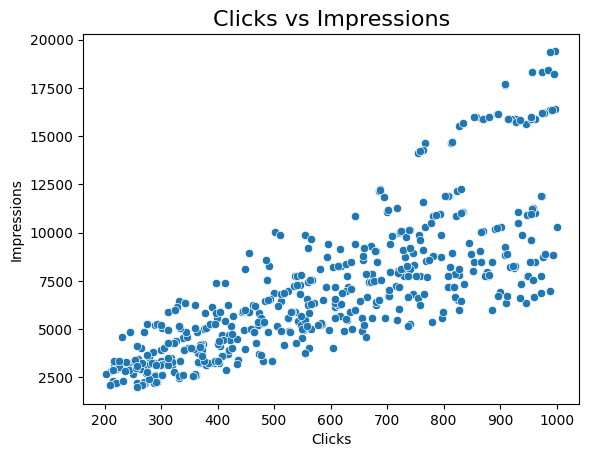

In [ ]:
# Gráfico de dispersão
srn.scatterplot(data=dataset, x='Clicks', y='Impressions')
plt.title('Clicks vs Impressions',fontsize=16)
plt.show()


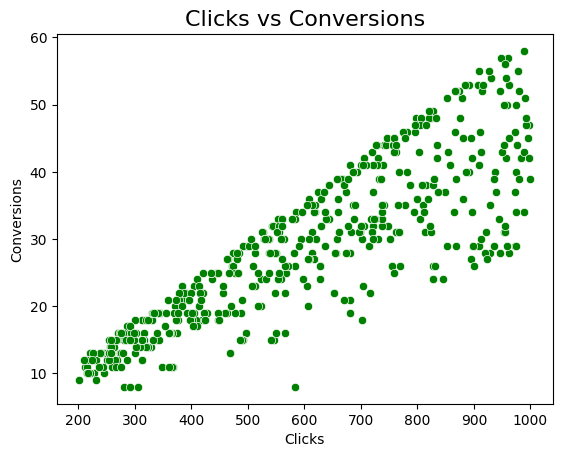

In [ ]:
srn.scatterplot(data=dataset, x='Clicks', y='Conversions', color='green')
plt.title('Clicks vs Conversions',fontsize=16)
plt.show()

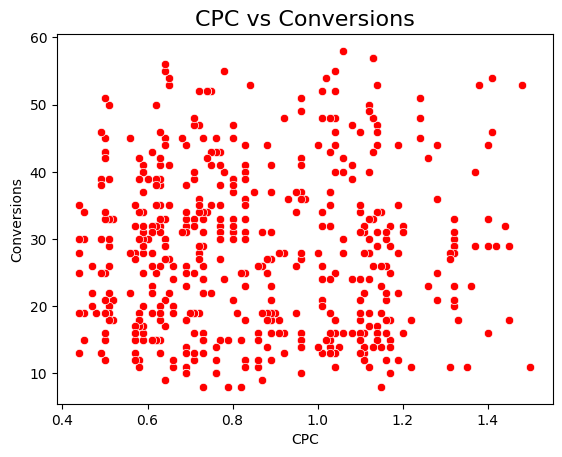

In [ ]:
srn.scatterplot(data=dataset, x='CPC', y='Conversions', color='red')
plt.title('CPC vs Conversions',fontsize=16)
plt.show()

<Axes: xlabel='CPC', ylabel='Clicks'>

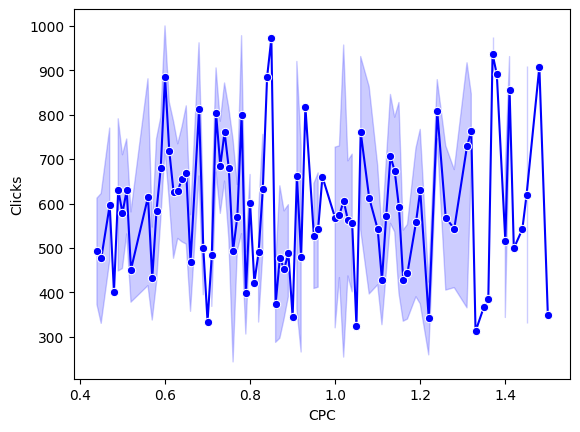

In [ ]:
srn.lineplot(data=dataset, x='CPC', y='Clicks', marker='o', color='blue')

<Axes: xlabel='CPC', ylabel='Conversions'>

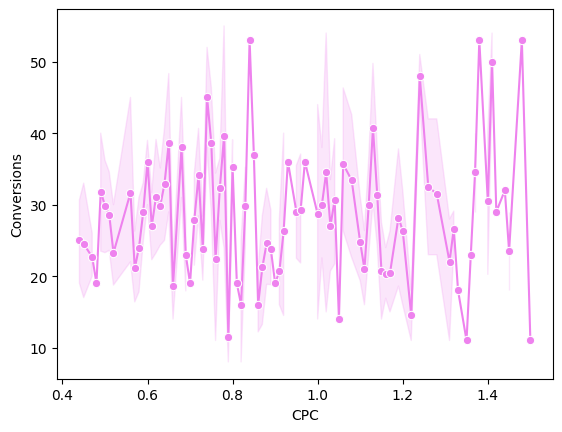

In [ ]:
srn.lineplot(data=dataset, x='CPC', y='Conversions', marker='o', color='violet')

<Axes: xlabel='Clicks', ylabel='Impressions'>

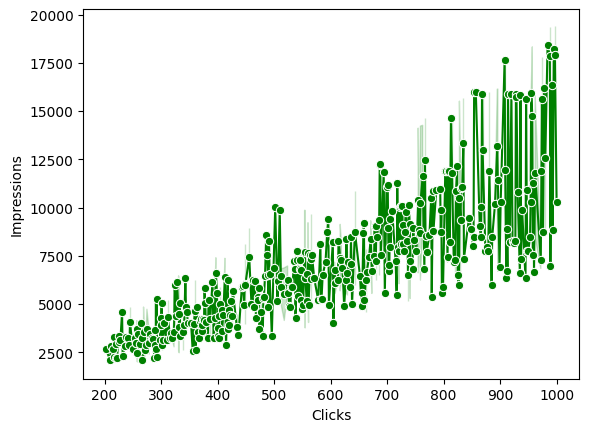

In [ ]:
srn.lineplot(data=dataset, x='Clicks', y='Impressions', marker='o', color='green')

<Axes: xlabel='Clicks', ylabel='Conversions'>

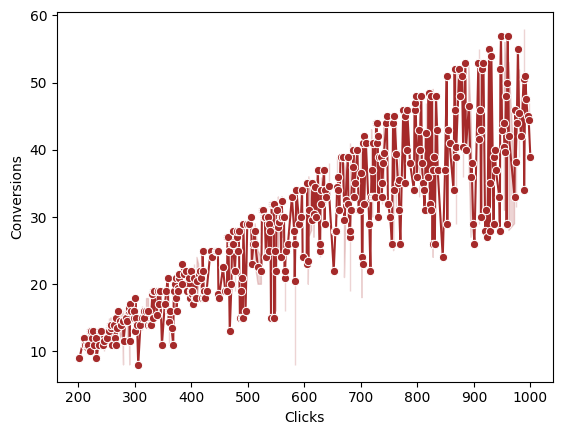

In [ ]:
srn.lineplot(data=dataset, x='Clicks', y='Conversions', marker='o', color='brown')

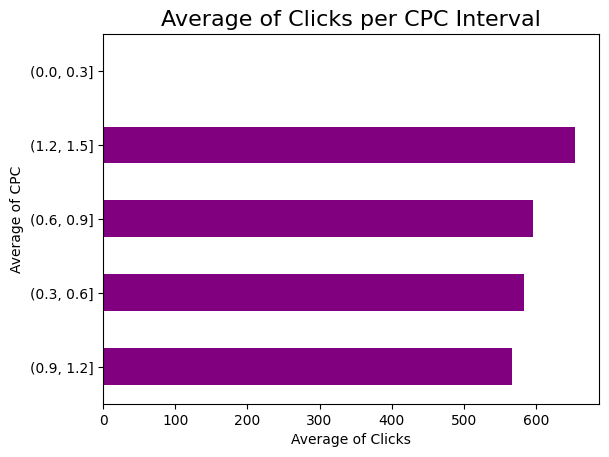

In [ ]:

# Definindo intervalos de CPC
cpc_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
dataset['CPCbin'] = pd.cut(dataset['CPC'], bins=cpc_bins)

# Média de cliques por intervalo de CPC com observed=False
mean_clicks = dataset.groupby('CPCbin', observed=False)['Clicks'].mean().sort_values()
mean_clicks.plot(kind='barh', color='purple')
plt.title('Average of Clicks per CPC Interval',fontsize=16)
plt.xlabel('Average of Clicks')
plt.ylabel('Average of CPC')
plt.show()


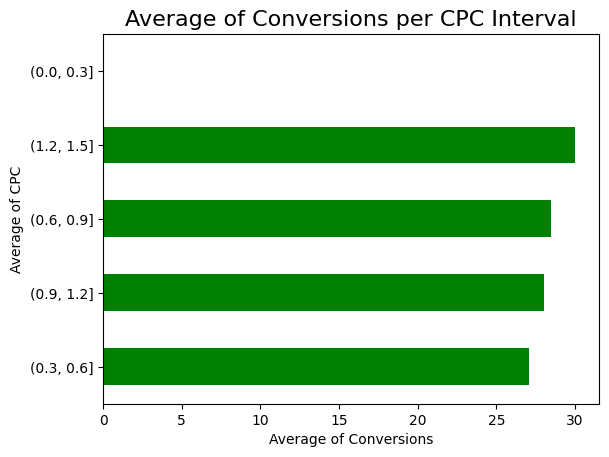

In [ ]:
# Definindo intervalos de CPC
cpc_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
dataset['CPCbin'] = pd.cut(dataset['CPC'], bins=cpc_bins)

# Média de cliques por intervalo de CPC com observed=False
mean_conversions = dataset.groupby('CPCbin', observed=False)['Conversions'].mean().sort_values()
mean_conversions.plot(kind='barh',color='green')
plt.title('Average of Conversions per CPC Interval',fontsize=16)
plt.xlabel('Average of Conversions')
plt.ylabel('Average of CPC')
plt.show()